In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train[:3]
# print(train)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26


In [5]:
test[:3]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian


In [6]:
train['Weatherconditions'] = train['Weatherconditions'].map(lambda x: str(x)[11:])
test['Weatherconditions'] = test['Weatherconditions'].map(lambda x: str(x)[11:])

train['Time_taken(min)'] = train['Time_taken(min)'].map(lambda x: str(x)[6:])

df1 = train['Weatherconditions']
print(df1.head())

0         Sunny
1        Stormy
2    Sandstorms
3         Sunny
4        Cloudy
Name: Weatherconditions, dtype: object


In [7]:
for i in train.columns:
    train[i].loc[train[i] == 'NaN '] = np.nan
    train[i].loc[train[i] == 'NaN'] = np.nan

for j in test.columns:
    test[j].loc[test[j] == 'NaN '] = np.nan
    test[j].loc[test[j] == 'NaN'] = np.nan

C:\Users\sumanthkonda\AppData\Local\Temp\ipykernel_27116\803987202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i].loc[train[i] == 'NaN '] = np.nan
C:\Users\sumanthkonda\AppData\Local\Temp\ipykernel_27116\803987202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i].loc[train[i] == 'NaN'] = np.nan
C:\Users\sumanthkonda\AppData\Local\Temp\ipykernel_27116\803987202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [8]:
train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [9]:
test.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64

In [10]:
# delete missing values in Time_Orderd column
train.dropna(subset=['Time_Orderd'], axis=0, inplace=True)
test.dropna(subset=['Time_Orderd'], axis=0, inplace=True)

# fill the missing values with their forward values
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

In [11]:
train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [12]:
test.isnull().any()

ID                             False
Delivery_person_ID             False
Delivery_person_Age            False
Delivery_person_Ratings        False
Restaurant_latitude            False
Restaurant_longitude           False
Delivery_location_latitude     False
Delivery_location_longitude    False
Order_Date                     False
Time_Orderd                    False
Time_Order_picked              False
Weatherconditions              False
Road_traffic_density           False
Vehicle_condition              False
Type_of_order                  False
Type_of_vehicle                False
multiple_deliveries            False
Festival                       False
City                           False
dtype: bool

In [13]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43862 non-null  object 
 1   Delivery_person_ID           43862 non-null  object 
 2   Delivery_person_Age          43862 non-null  object 
 3   Delivery_person_Ratings      43862 non-null  object 
 4   Restaurant_latitude          43862 non-null  float64
 5   Restaurant_longitude         43862 non-null  float64
 6   Delivery_location_latitude   43862 non-null  float64
 7   Delivery_location_longitude  43862 non-null  float64
 8   Order_Date                   43862 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            43862 non-null  object 
 11  Weatherconditions            43862 non-null  object 
 12  Road_traffic_density         43862 non-null  object 
 13  Vehicle_conditio

In [14]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken(min)']
features1 =  ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']
for i in features:
    train[i] = train[i].astype(str).astype(float)
    for j in features1:
        test[j] = test[j].astype(str).astype(float)

In [15]:
train['Ordered_Time'] = train['Order_Date'] + str(' ') + train['Time_Orderd']
train['Picked_Time'] = train['Order_Date'] + str(' ') + train['Time_Order_picked']

test['Ordered_Time'] = test['Order_Date'] + str(' ') + test['Time_Orderd']
test['Picked_Time'] = test['Order_Date'] + str(' ') + test['Time_Order_picked']

# convert into datetime format
train['Ordered_Time'] = pd.to_datetime(train['Ordered_Time'])
train['Picked_Time'] = pd.to_datetime((train['Picked_Time']))

test['Ordered_Time'] = pd.to_datetime(test['Ordered_Time'])
test['Picked_Time'] = pd.to_datetime((test['Picked_Time']))

In [16]:
train['Time_Ordered_picked'] = ((train['Picked_Time'] - train['Ordered_Time'])/pd.Timedelta(1,'min')).fillna(0).astype(int)
test['Time_Ordered_picked'] = ((test['Picked_Time'] - test['Ordered_Time'])/pd.Timedelta(1, 'min')).fillna(0).astype(int)

In [17]:
train['Time_Ordered_picked'].value_counts()

 5       14564
 10      14288
 15      14179
-1425      431
-1430      261
-1435      139
Name: Time_Ordered_picked, dtype: int64

In [18]:
test['Time_Ordered_picked'].value_counts()

 10      3591
 15      3587
 5       3575
-1425     103
-1430      62
-1435      37
Name: Time_Ordered_picked, dtype: int64

In [19]:
train['Time_Ordered_picked'].replace([-1425, -1430, -1435], [15,10,5], inplace=True)
test['Time_Ordered_picked'].replace([-1425, -1430, -1435], [15,10,5], inplace=True)

In [20]:
ID = test.ID

In [21]:
train.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
test.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)

In [22]:
train.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
            'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Ordered_Time', 'Picked_Time'], axis=1, inplace=True)
test.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
            'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Ordered_Time', 'Picked_Time'], axis=1, inplace=True)

In [23]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10955 entries, 1 to 11398
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      10955 non-null  float64
 1   Delivery_person_Ratings  10955 non-null  float64
 2   Weatherconditions        10955 non-null  object 
 3   Road_traffic_density     10955 non-null  object 
 4   Vehicle_condition        10955 non-null  float64
 5   Type_of_order            10955 non-null  object 
 6   Type_of_vehicle          10955 non-null  object 
 7   multiple_deliveries      10955 non-null  float64
 8   Festival                 10955 non-null  object 
 9   City                     10955 non-null  object 
 10  Time_Ordered_picked      10955 non-null  int32  
dtypes: float64(4), int32(1), object(6)
memory usage: 984.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column     

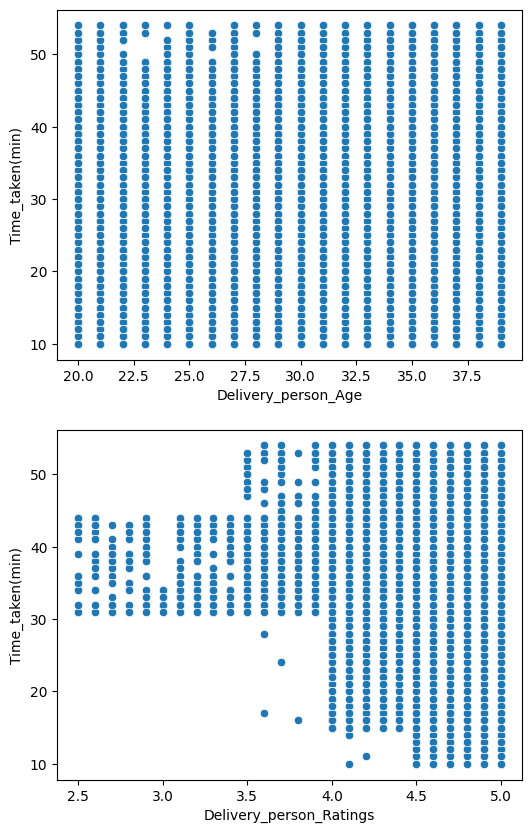

In [24]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,10), dpi=100)
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=train, ax=ax1)
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=train, ax=ax2)
plt.show()

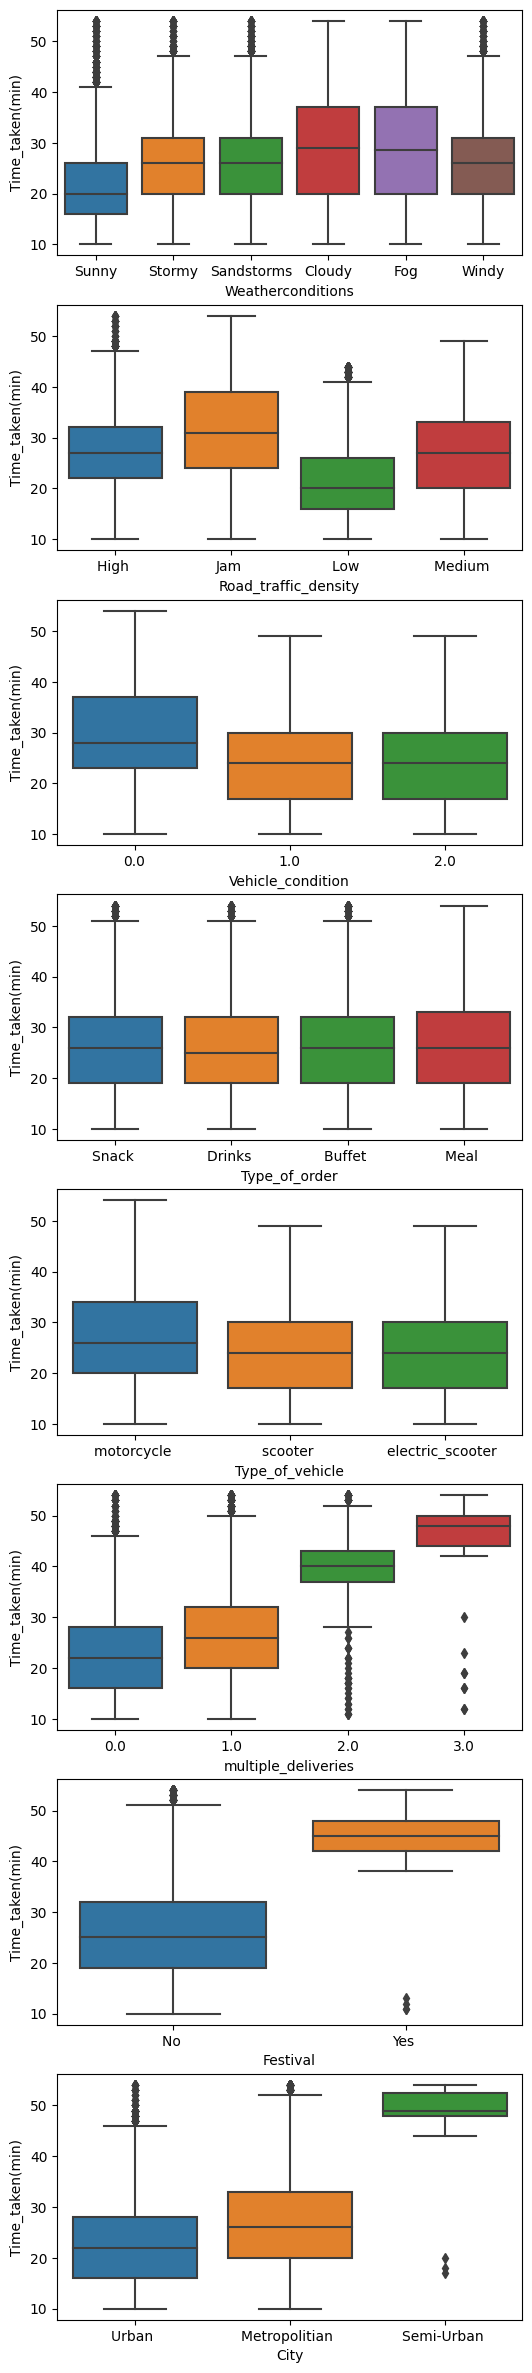

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize=(6,30), dpi=100)
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=train, ax=ax1)
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=train, ax=ax2)
sns.boxplot(x='Vehicle_condition', y='Time_taken(min)', data=train, ax=ax3)
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=train, ax=ax4)
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=train, ax=ax5)
sns.boxplot(x='multiple_deliveries', y='Time_taken(min)', data=train, ax=ax6)
sns.boxplot(x='Festival', y='Time_taken(min)', data=train, ax=ax7)
sns.boxplot(x='City', y='Time_taken(min)', data=train, ax=ax8)
plt.show()

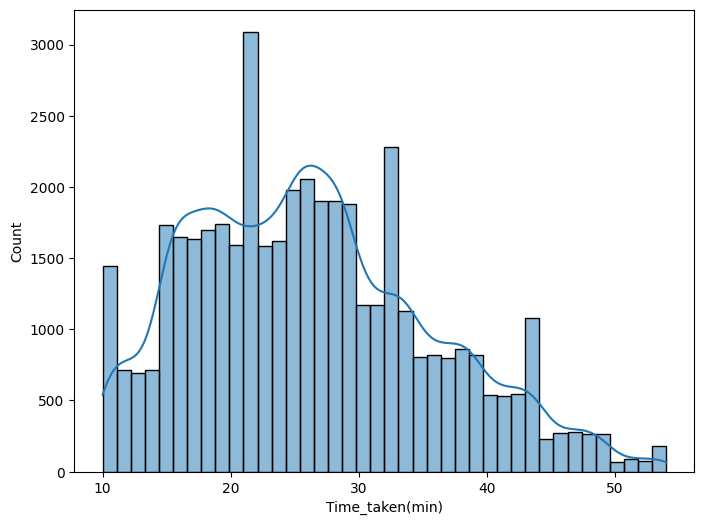

In [26]:
plt.figure(figsize=(8,6), dpi=100)
sns.histplot(train['Time_taken(min)'], bins=40, kde=True)
plt.show()

In [27]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [33]:
x = train.drop('Time_taken(min)', axis=1)
y = train['Time_taken(min)']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
y_pred = knn.predict(x_test)

print(y_pred)

0.06793829318337259
[26. 31. 13. ... 15. 23. 20.]


In [35]:
ln = LinearRegression()
ln.fit(x_train,y_train)
print("The Score For Linear Regression is : ", ln.score(x_test,y_test))
print("The Intercept For Linear Regression is : ", ln.intercept_)
print("The Coefficient For Linear Regression is : ", ln.coef_)

y_test=ln.predict(x_test)
print(y_test)

The Score For Linear Regression is :  0.5681032550349132
The Intercept For Linear Regression is :  59.464429361824976
The Coefficient For Linear Regression is :  [ 3.81311023e-01 -7.87404744e+00 -2.12071907e+00  3.10403768e+00
 -5.59635904e-03  2.42245232e+00  2.45223706e+00 -4.05407810e-01
 -4.08650442e-01 -3.75941517e+00 -3.01215965e-01  6.04739834e-01
  3.54071348e+00 -4.56307190e+00  4.17618591e-01  5.77868995e-03
 -3.27316095e-02 -3.37064476e-02  6.06593672e-02  4.55039027e-01
  2.49199633e-02 -4.79958991e-01 -5.02173005e+00  5.02173005e+00
 -2.44056744e+00  6.93891461e+00 -4.49834717e+00]
[35.69156445 23.4172955  19.56275799 ... 13.44804236 22.89422946
 16.34912496]
